In [1]:
import re
import glob

import skipthoughts
import numpy as np
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE

In [2]:
def sentence_spliter(text):
    #split the sentence based on the occurance of the [. or ! or ?]
    #split the sentence based on the occurance of ] or ) or " or '
    return re.split(' *[\.\?\!][\'"\)\]]* *', text)
    

In [3]:
def sentence_preprocessor(sentence):
    #first convert everything in to lower-case
    ps = sentence.lower()
    #replace 's with original word
    ps = re.sub(r'([\w])?(\'s)', r'\1', ps)
    #attempt to remove all special characters including full stops
    ps = re.sub(r'[^\w\s]','', ps)
    #substitute all numbers in the sentences to "", this is a experimental approach,
    ps = re.sub(r'\d', '', ps)
    #some sentences begin with white spaces, or end with white spaces, remove them
    ps = re.sub(r'(^[\s]*)|([\s]*$)', "", ps)
    #remove multiple occurances of space
    ps = re.sub(r'[\s]{2,}', " ", ps)
    return ps
    


In [4]:
#test-sentence_preprocessor

print(sentence_preprocessor("THIS IS A TEST SENTENCE."))
print(sentence_preprocessor("The phone's battery is pathetic!"))
print(sentence_preprocessor("The phone has 3 cameras."))
print(sentence_preprocessor("This sentence has  two white spaces"))
print(sentence_preprocessor("             ,This begin's with a white space,  has double spaces and digits like 1,2,3 "))


this is a test sentence
the phone battery is pathetic
the phone has cameras
this sentence has two white spaces
this begin with a white space has double spaces and digits like


In [5]:
#Takes a file. Tokenizes each sentence into list of words and add it to the return list.
def tokenize_file(filename,ignore_list):
    file_list=[]
    with open(filename) as infile:
        for line in infile:
            processed_line=remove_punctuation(line)
            file_list.append(tokenize(processed_line,ignore_list))
    return file_list

In [6]:
#Takes a filename and converts each line in the file to list and returns all these lists as a list
def make_list(filename):
    sentence_list=[]
    with open(filename) as infile:
        for line in infile:
            sentence_list.append([line.rstrip()])
    return sentence_list


In [7]:
model = skipthoughts.load_model()
encoder = skipthoughts.Encoder(model)

/home/arunhiremath/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/ /home/arunhiremath/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/uni_skip.npz
Loading model parameters...
<built-in method items of collections.OrderedDict object at 0x7fc55af420d0>
<built-in method items of collections.OrderedDict object at 0x7fc51e9559d8>
Compiling encoders...
Loading tables...
/home/arunhiremath/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/
Packing up...


In [11]:
demoFile = open("demofile.txt", "rt")
text = demoFile.read()
sentence_list = sentence_spliter(text)
lines = []
for s in sentence_list:
    print("Original\n {}".format(s))
    ps = sentence_preprocessor(s)
    lines.append(ps)
    print("Pre-processed \n {}".format(ps))
    
    

Original
 Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long,  distance cruiser
Pre-processed 
 very happy with my accord performance is quite adequate it has nice looks and is a great long distance cruiser
Original
 
6, 4, 3 eco engine has poor performance and gas mileage of 22 highway
Pre-processed 
 eco engine has poor performance and gas mileage of highway
Original
 
Overall performance is good but comfort level is poor
Pre-processed 
 overall performance is good but comfort level is poor
Original
 
I'm impressed with the performance as well as efficiency gains
Pre-processed 
 im impressed with the performance as well as efficiency gains
Original
 
It has room, performance, good MPG for its size and excellent reliability
Pre-processed 
 it has room performance good mpg for its size and excellent reliability
Original
 
For the record I test, drove the Lexus350 the BMW 5 series, the infiniti G35 and enjoyed the Honda performance equally 

In [12]:
#Encoding the sentences

In [16]:
embedding_clusters = []
sentence_clusters  = {}
for i,s in enumerate(lines):
    vector = encoder.encode([s], verbose=False)
    embedding_clusters.append(vector[:, 2400:].tolist())
    sentence_clusters[i] = s    

ValueError: ('Sequence is shorter than the required number of steps : (n_steps, seq, seq.shape):', 1, array([], shape=(0, 1, 1), dtype=float32), (0, 1, 1))
Apply node that caused the error: forall_inplace,cpu,encoder__layers}(Elemwise{Maximum}[(0, 0)].0, Elemwise{sub,no_inplace}.0, InplaceDimShuffle{0,1,x}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, IncSubtensor{InplaceSet;:int64:}.0, encoder_U, encoder_Ux, ScalarFromTensor.0, ScalarFromTensor.0)
Toposort index: 50
Inputs types: [TensorType(int64, scalar), TensorType(float32, (False, False, True)), TensorType(float32, (False, False, True)), TensorType(float32, 3D), TensorType(float32, 3D), TensorType(float32, 3D), TensorType(float32, matrix), TensorType(float32, matrix), Scalar(int64), Scalar(int64)]
Inputs shapes: [(), (0, 1, 1), (0, 1, 1), (0, 1, 4800), (0, 1, 2400), (3, 1, 2400), (2400, 4800), (2400, 2400), (), ()]
Inputs strides: [(), (4, 4, 4), (4, 4, 4), (19200, 19200, 4), (9600, 9600, 4), (9600, 9600, 4), (19200, 4), (9600, 4), (), ()]
Inputs values: [array(1), array([], shape=(0, 1, 1), dtype=float32), array([], shape=(0, 1, 1), dtype=float32), array([], shape=(0, 1, 4800), dtype=float32), array([], shape=(0, 1, 2400), dtype=float32), 'not shown', 'not shown', 'not shown', 2400, 4800]
Outputs clients: [[Subtensor{int64}(forall_inplace,cpu,encoder__layers}.0, ScalarFromTensor.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [17]:
print(sentence_clusters)


{0: 'very happy with my accord performance is quite adequate it has nice looks and is a great long distance cruiser', 1: 'eco engine has poor performance and gas mileage of highway', 2: 'overall performance is good but comfort level is poor', 3: 'im impressed with the performance as well as efficiency gains', 4: 'it has room performance good mpg for its size and excellent reliability', 5: 'for the record i test drove the lexus the bmw series the infiniti g and enjoyed the honda performance equally for far less money', 6: 'very happy with the car enjoy the ride and performance', 7: 'the performance of the engine is very smooth', 8: 'this car had rattles at miles and has horrible performance even for a four cylinder', 9: 'great performance and handling make this a real winner', 10: 'engine performance lacks punch after head rest are poor design lacks driver seat memory rear seat a c radio system is marginal compared to bose seats are hard and small for a large person', 11: 'there seem to

In [24]:
#Converts a multi-dimenson array in to 2D array, that would be easier for visualization.
embedding_clusters = np.array(embedding_clusters)
n,m,k = embedding_clusters.shape
print(embedding_clusters.shape)
print(embedding_clusters.reshape(n*m, 2400))
embedding_clusters_asa = embedding_clusters.reshape(n*m, 2400)

(167, 1, 2400)
[[ 2.12032418e-03  6.35956123e-04 -1.20334933e-03 ...  1.02916248e-02
   1.38149888e-03  2.56822202e-02]
 [ 6.83708349e-04  1.60300711e-04 -3.91333859e-04 ... -3.58916819e-02
   7.01147970e-03  7.40345428e-03]
 [ 5.36200474e-04 -4.85703378e-04 -1.75042602e-04 ... -3.42086353e-03
   8.45049042e-03 -1.51586318e-02]
 ...
 [-7.21067307e-04  8.64112866e-04 -1.06422660e-04 ... -1.28646065e-02
   7.04574026e-03 -1.64593831e-02]
 [ 5.30336925e-04  6.33332093e-06 -4.01542638e-04 ... -8.64715548e-04
   2.77959136e-03  5.34078106e-03]
 [ 3.76239978e-03  1.07463193e-03 -6.92469941e-04 ... -1.85610484e-02
   5.73663693e-03 -2.00415812e-02]]


In [25]:
from sklearn.cluster import KMeans

tsne_model_en_2d = TSNE(n_iter=5000)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters_asa)).reshape(n, m, 2)

kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)

n, m , k = embedding_clusters.shape
embedding_clusters_asa = embedding_clusters.reshape(n * m, k)

kmeans.fit(embedding_clusters_asa)
labels = kmeans.predict(embedding_clusters_asa)

centroids = kmeans.cluster_centers_
colors = []
for l in labels:
    if l == 0:
        colors.append('red')
    else:
        colors.append('blue')

In [26]:
print(colors)

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red'

In [27]:

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(10, 9))
    for label, embeddings,color in zip(labels, embedding_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y,alpha=a,s=23, c=color)
        plt.annotate(label, alpha=0.5, xy=(x,y), xytext=(5, 5),
                         textcoords='offset points', ha='right', va='bottom', size=10)
            
    plt.show()

<IPython.core.display.Javascript object>


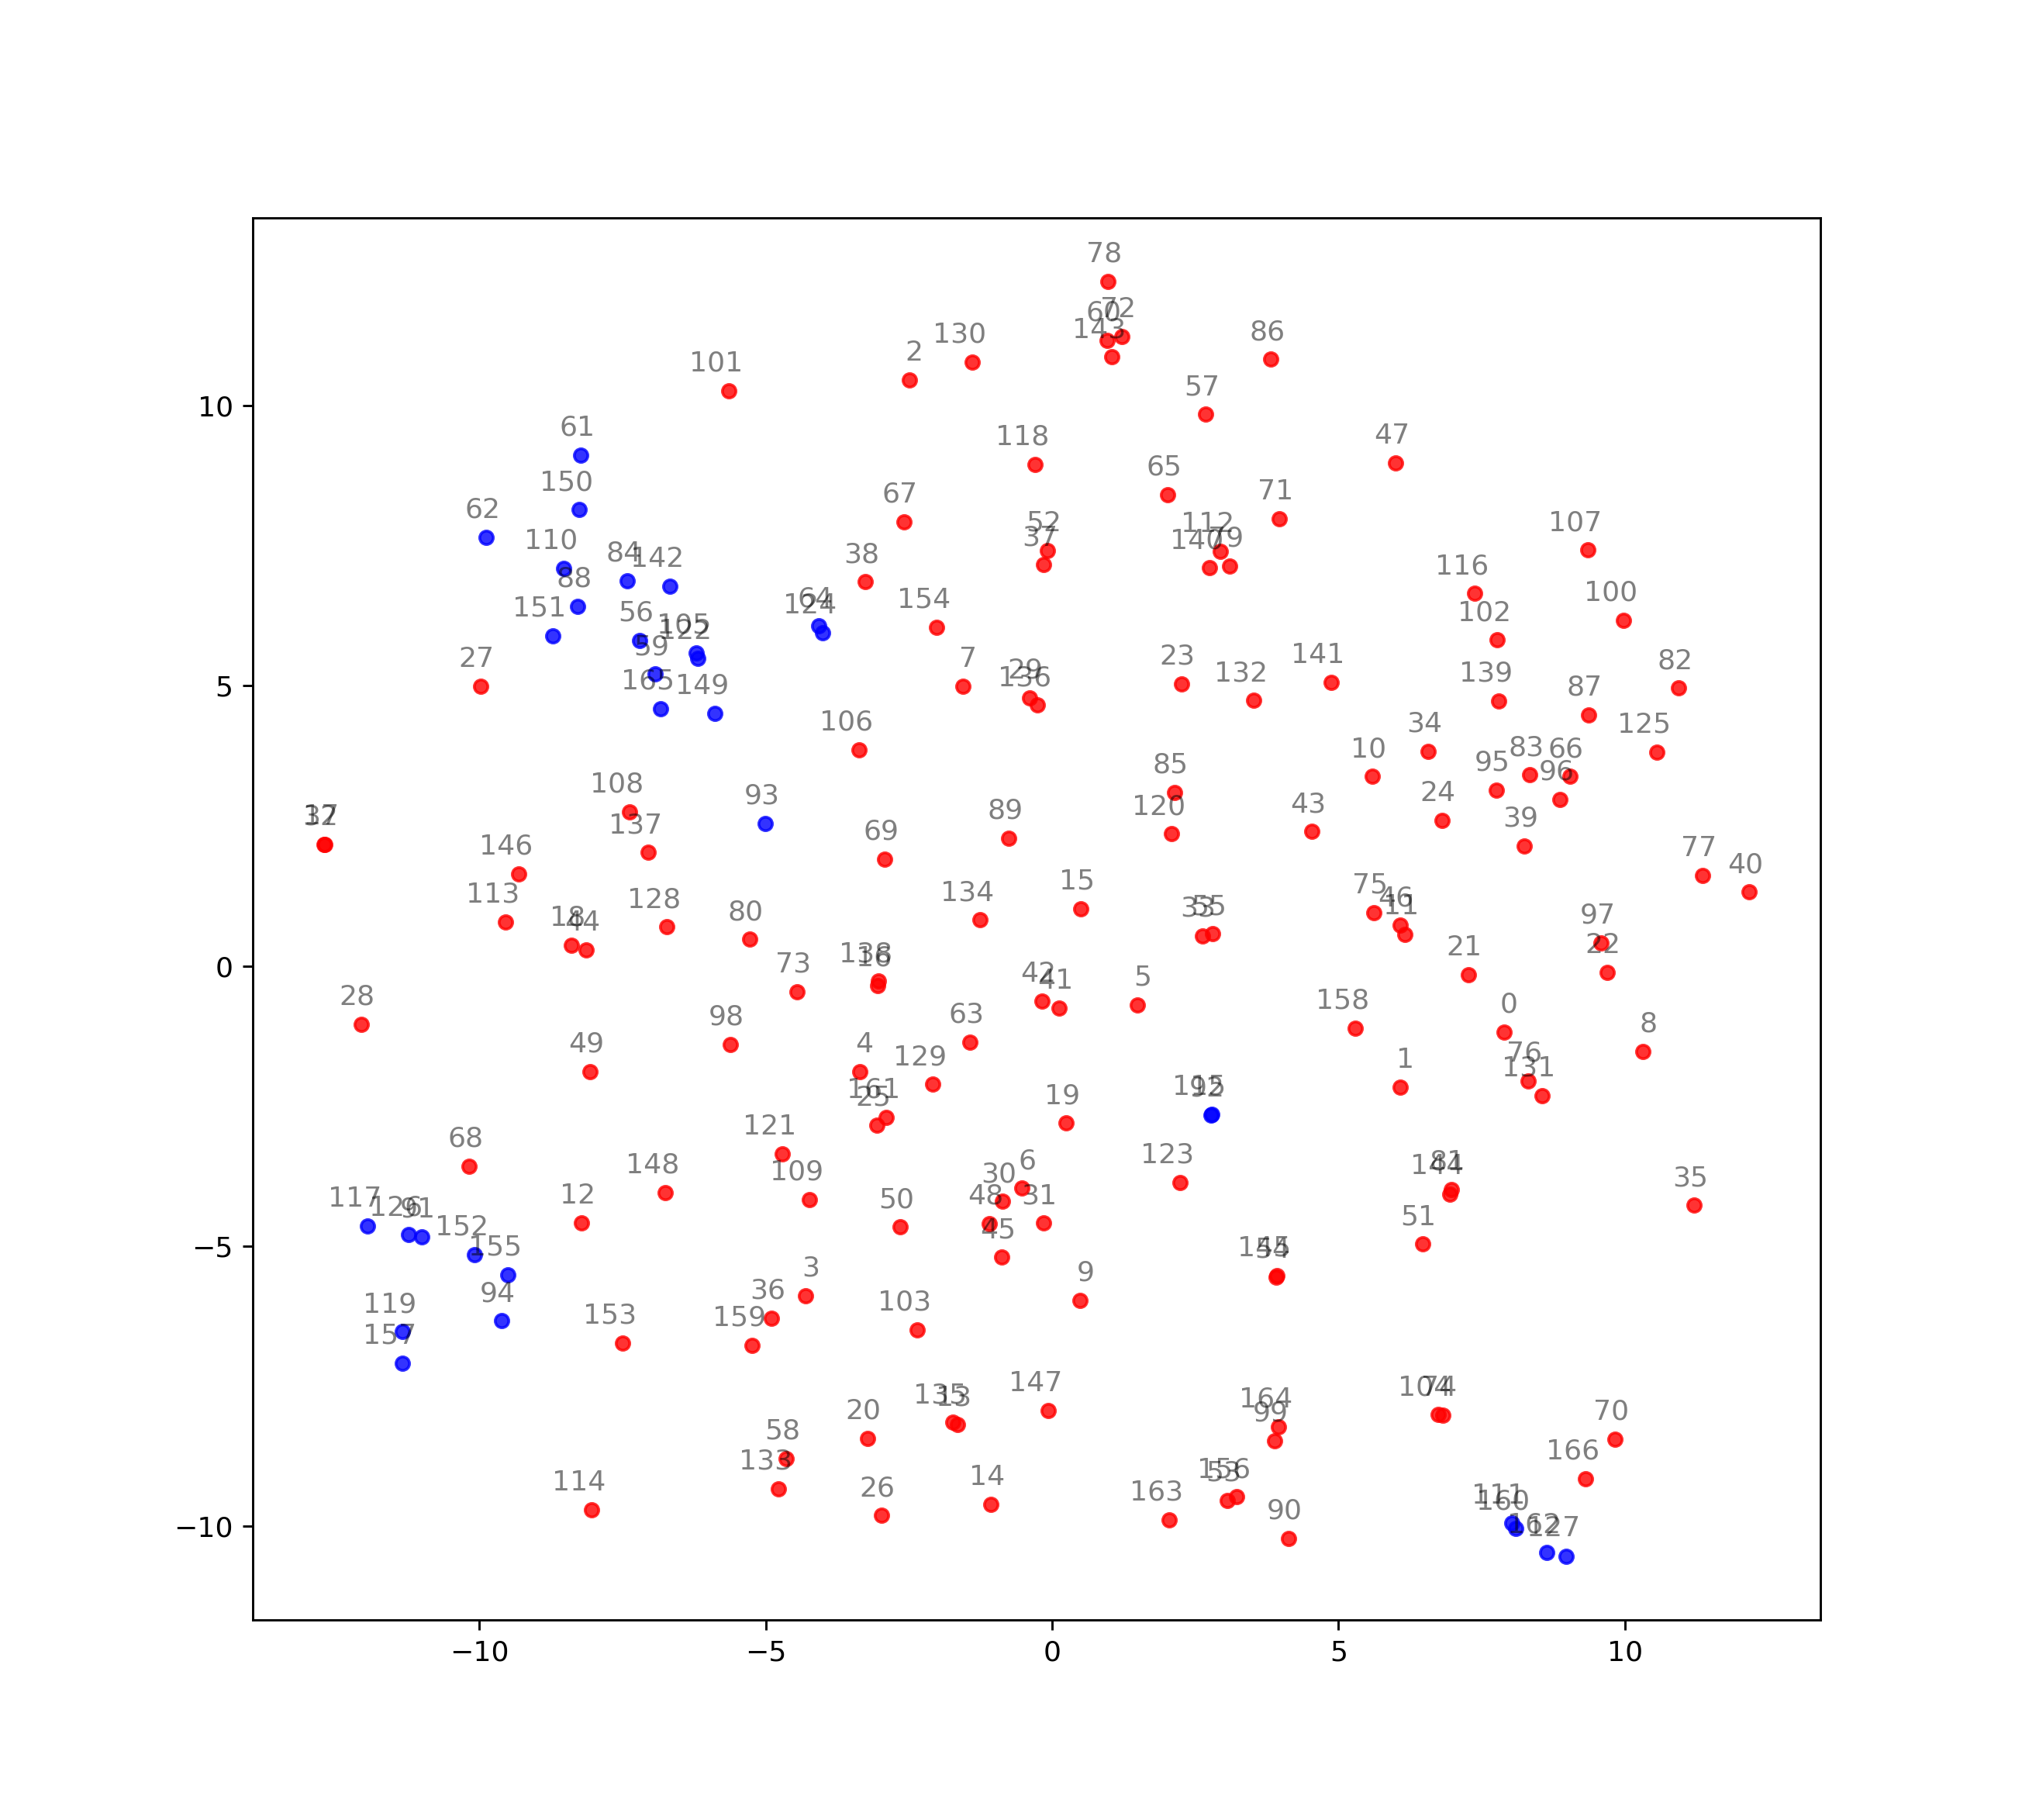

In [28]:
tsne_plot_similar_words('Sentence Embeddings',
                        sentence_clusters.keys(),
                        embeddings_en_2d, 
                        sentence_clusters,
                        0.8,
                        'sentence_embeddings.png')

In [148]:
for (key,value) in sentence_clusters.items():
    print("Label-{}::{}".format(key, value))

Label-0::very happy with my accord performance is quite adequate it has nice looks and is a great long distance cruiser
Label-1::eco engine has poor performance and gas mileage of highway
Label-2::overall performance is good but comfort level is poor
Label-3::im impressed with the performance as well as efficiency gains
Label-4::it has room performance good mpg for its size and excellent reliability
Label-5::for the record i test drove the lexus the bmw series the infiniti g and enjoyed the honda performance equally for far less money
Label-6::very happy with the car enjoy the ride and performance
Label-7::the performance of the engine is very smooth
Label-8::this car had rattles at miles and has horrible performance even for a four cylinder
Label-9::great performance and handling make this a real winner
Label-10::engine performance lacks punch after head rest are poor design lacks driver seat memory rear seat a c radio system is marginal compared to bose seats are hard and small for a

In [149]:
#99 : Very comfortable, quiet interior
#122: Very quiet and comfortable ride, more than enough power .
#128: Very comfortable, quite and smooth ride .


In [150]:
#105 : It looks awesome, turns like it's on rails, has a great sound system, and is just comfortable and fun to drive .
#145 : It is a beautiful sapphire blue, has really nice lines, is very comfortable, is plenty peppy, and hugs the road .
#140 : Comfort is great, mileage is good overall, better on the road than expected  , compared to my 1999 Camry .

In [151]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [26]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


In [27]:
print(centroids)

[[-1.83147624e-04  2.41385176e-05 -1.98008385e-04 ...  5.06935453e-03
   2.28370432e-03  2.62644048e-03]
 [-2.86082164e-04  1.58713910e-04 -3.90013831e-04 ... -7.65965051e-03
   5.14795593e-03  5.51569560e-03]]


<IPython.core.display.Javascript object>


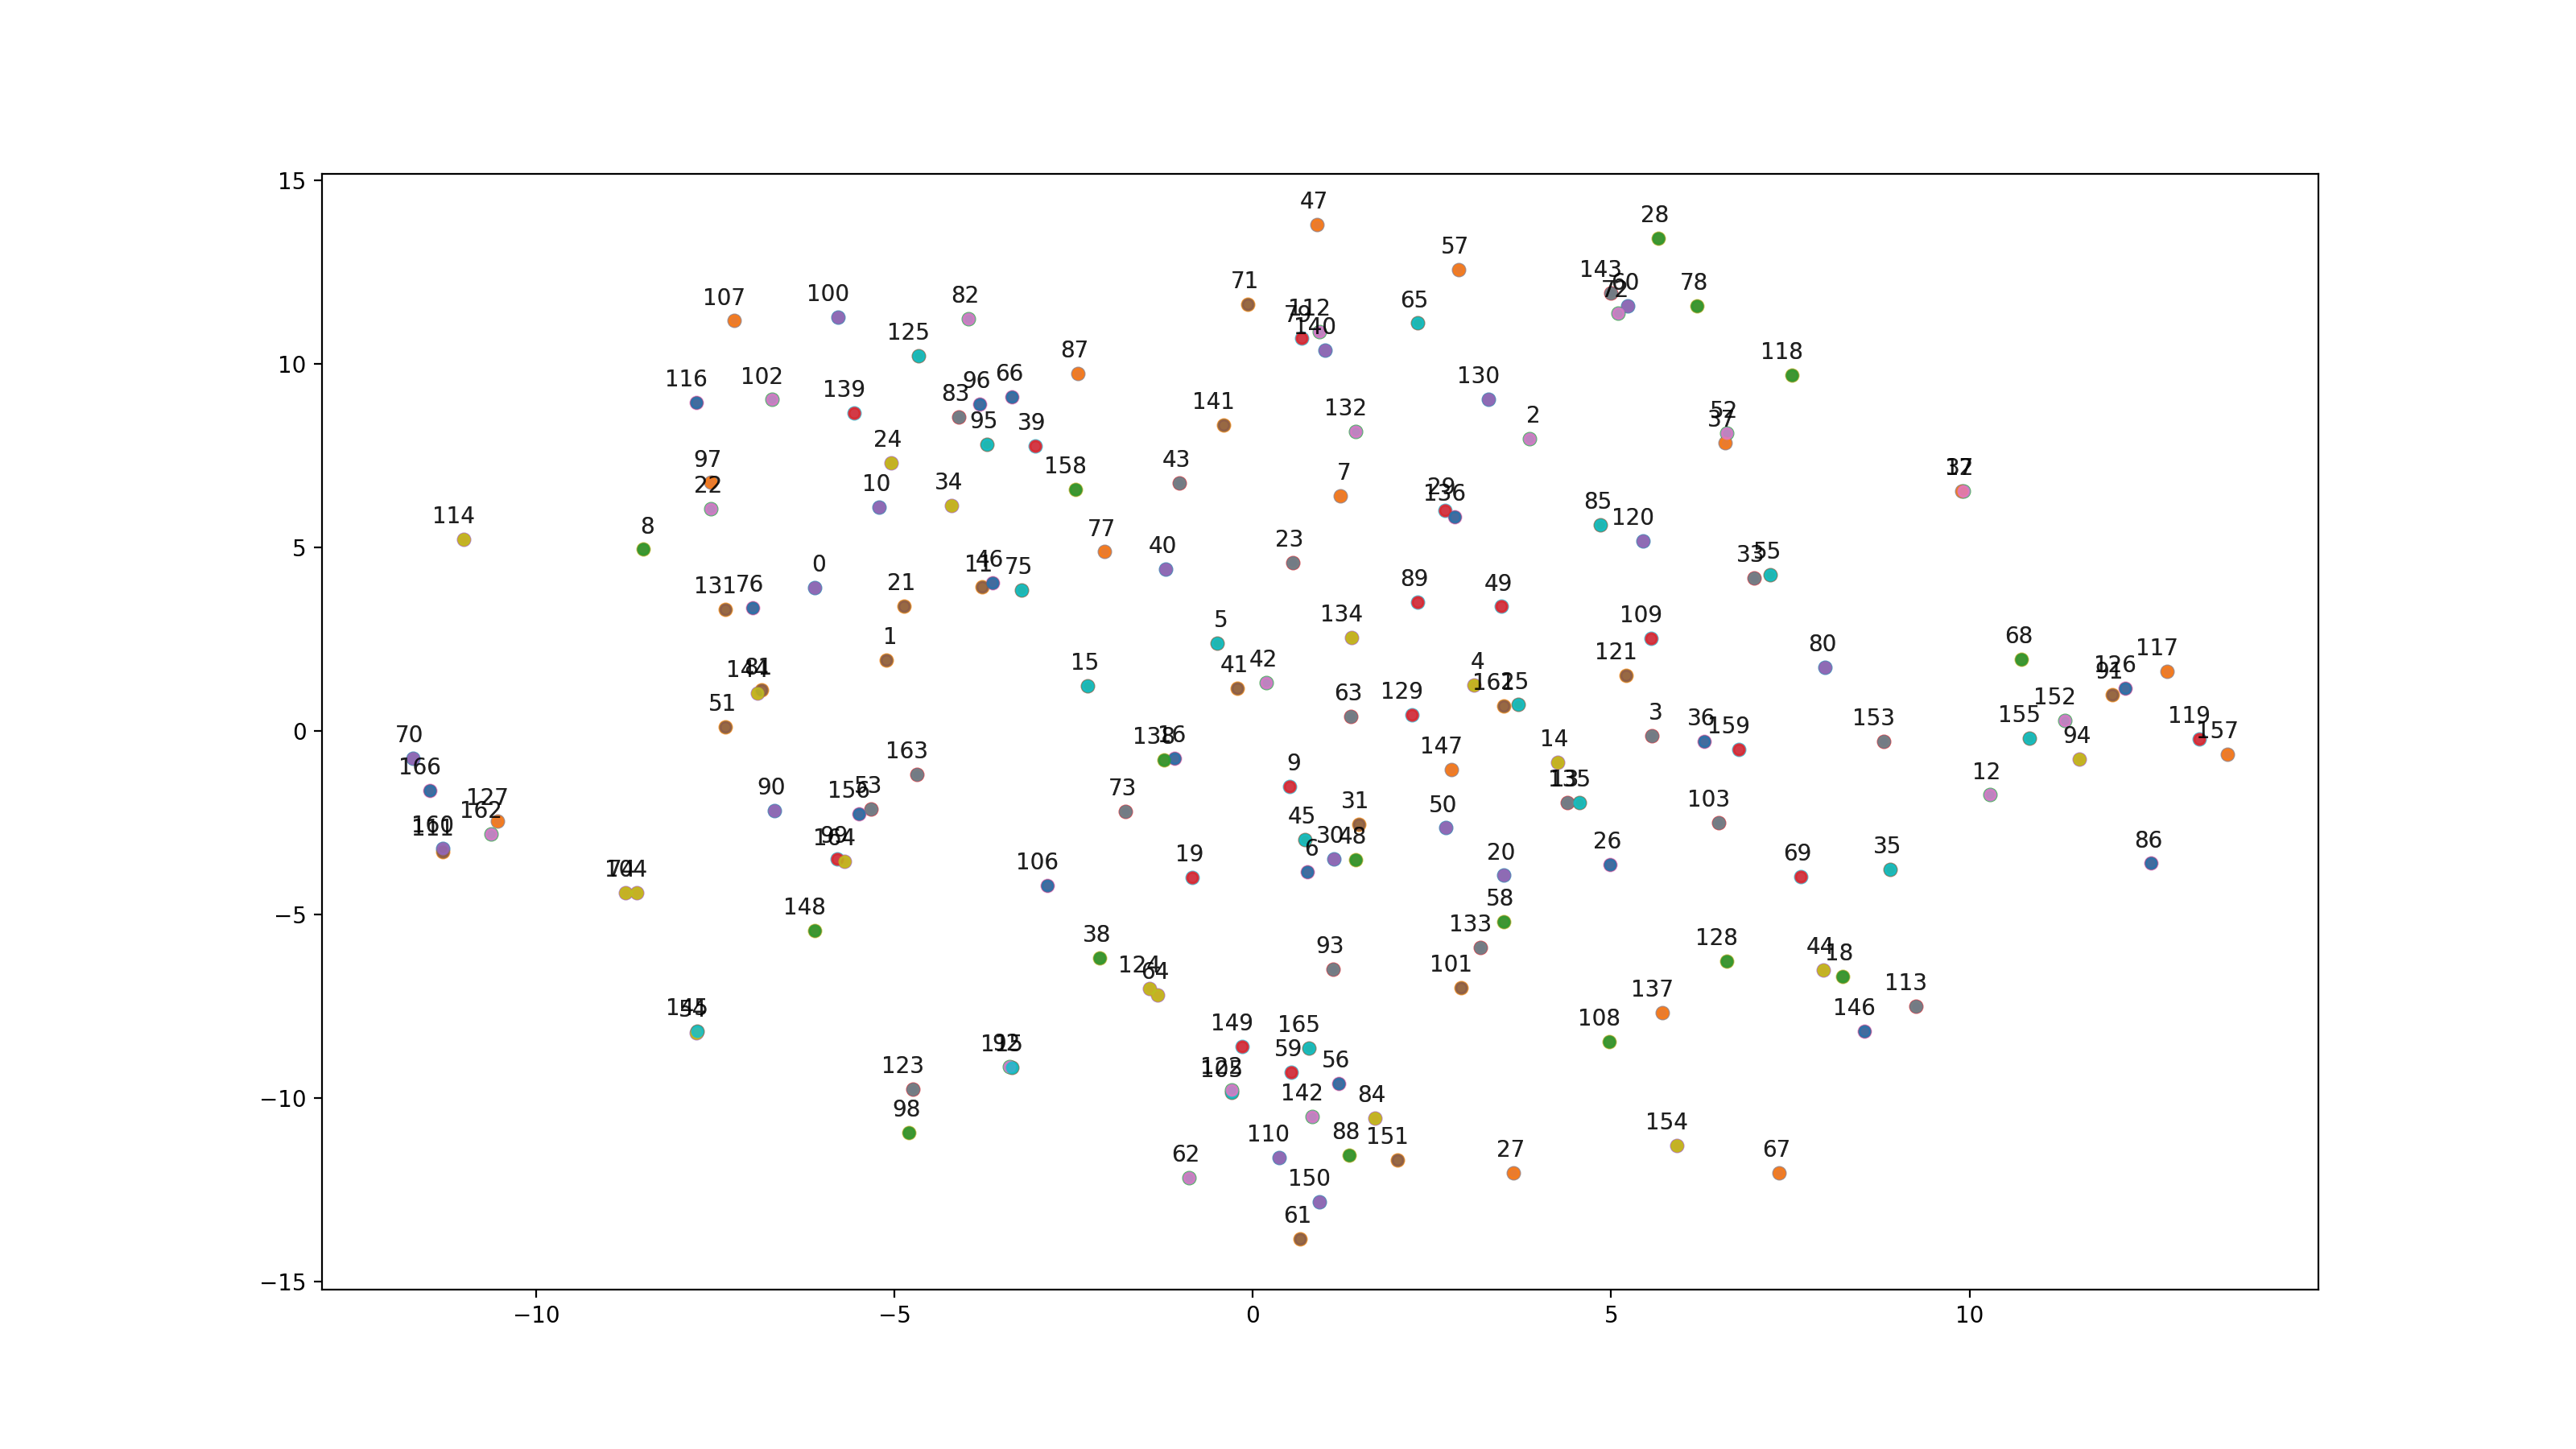

In [35]:
tsne_plot_similar_words('Sentence Embeddings', sentence_clusters.keys(), embeddings_en_2d, sentence_clusters, 0.8,
                        'sentence_embeddings.png')